In [113]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

In [48]:
# Creating the DataFrame 
df = pd.DataFrame({'Weight':[45, 88, 56, 15, 71], 
                   'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'], 
                   'Age':[14, 25, 55, 8, 21]}) 
df.head()

,Weight,Name,Age
0,45,Sam,14
1,88,Andrea,25
2,56,Alex,55
3,15,Robin,8
4,71,Kia,21


In [92]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),
...                    columns=['a', 'b', 'c'])
df2.head()

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [3]:
# Create the index 
index_ = ['Row_1', 'Row_2', 'Row_3', 'Row_4', 'Row_5'] 
  
# Set the index 
df.index = index_ 
  
# Print the DataFrame 
df.head()# return the value 
result = df.loc['Row_2', 'Name'] 
  
# Print the result 
print(result) 

,Weight,Name,Age
Row_1,45,Sam,14
Row_2,88,Andrea,25
Row_3,56,Alex,55
Row_4,15,Robin,8
Row_5,71,Kia,21


In [4]:
# return the value 
result = df.loc['Row_2', 'Name'] 
  
# Print the result 
print(result) 

Andrea


### get_dummies function

In [3]:
s = pd.Series(list('pqrp'))
s

0    p
1    q
2    r
3    p
dtype: object

In [8]:
pd.get_dummies(s)

,p,q,r
0,1,0,0
1,0,1,0
2,0,0,1
3,1,0,0


### pandas.Series.value_counts
#### Series.value_counts(self, normalize=False, sort=True, ascending=False, bins=None, dropna=True)[source]¶
#### Return a Series containing counts of unique values.

#### The resulting object will be in descending order so that the first element is the most frequently-occurring element. Excludes NA values by default.

In [4]:
index = pd.Index([3, 1, 2, 3, 4, np.nan])
index.value_counts()

3.0    2
4.0    1
2.0    1
1.0    1
dtype: int64

In [6]:
# With normalize set to True, returns the relative frequency by dividing all values by the sum of values.
s = pd.Series([3, 1, 2, 3, 4, np.nan])
s.value_counts(normalize=True)

3.0    0.4
4.0    0.2
2.0    0.2
1.0    0.2
dtype: float64

In [7]:
# bins
# Bins can be useful for going from a continuous variable to a categorical variable; instead of counting unique apparitions of values, divide the index in the specified number of half-open bins.
s.value_counts(bins=3)

(2.0, 3.0]      2
(0.996, 2.0]    2
(3.0, 4.0]      1
dtype: int64

In [9]:
# dropna
#With dropna set to False we can also see NaN index values.
s.value_counts(dropna=False)

3.0    2
NaN    1
4.0    1
2.0    1
1.0    1
dtype: int64

## Understanding Axis

In [13]:
srs_a = pd.Series([10,30,60,80,90])
srs_b = pd.Series([22, 44, 55, 77, 101])
df = pd.DataFrame({'a': srs_a, 'b': srs_b})
df

,a,b
0,10,22
1,30,44
2,60,55
3,80,77
4,90,101


In [14]:
df.sum(axis = 0)

a    270
b    299
dtype: int64

In [15]:
df.sum(axis = 1)

0     32
1     74
2    115
3    157
4    191
dtype: int64

## Handling Missing Values

In [85]:
imputerData = pd.read_csv('D:\\Ipynb Datasets\\ImputerDataset.csv')
imputerData.head(5)

,Country,Age,Gender,Occupation,Employment Status,Employement Type,Salary,Purchased
0,Poland,34.0,Male,Salaried,Yes,Permanent,72000.0,No
1,Spain,42.0,Female,Business,Yes,Temporary,48000.0,Yes
2,Germany,29.0,Male,Business,No,Temporary,54000.0,No
3,Spain,38.0,Male,Business,No,Permanent,61000.0,No
4,Germany,32.0,Male,Salaried,NaN,Permanent,NaN,Yes


#### Get All columns Information

In [68]:
imputerData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
Country              20 non-null object
Age                  17 non-null float64
Gender               20 non-null object
Occupation           18 non-null object
Employment Status    17 non-null object
Employement Type     17 non-null object
Salary               16 non-null float64
Purchased            20 non-null object
dtypes: float64(2), object(6)
memory usage: 1.4+ KB


#### Sum number of all null values for each column

In [70]:
imputerData.isnull().sum()

Country              0
Age                  3
Gender               0
Occupation           2
Employment Status    3
Employement Type     3
Salary               4
Purchased            0
dtype: int64

#### Data without missing values wrt columns

In [73]:
data_without_missing_cols = imputerData.dropna(axis = 1)
data_without_missing_cols.head()
#
# Data without missing rows 
# data_without_missing_rows = imputerData.dropna(axis = 1)

,Country,Gender,Purchased
0,Poland,Male,No
1,Spain,Female,Yes
2,Germany,Male,No
3,Spain,Male,No
4,Germany,Male,Yes


### 1. Imputer

In [84]:
#from sklearn.preprocessing import Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values = np.NaN, strategy = 'mean')

#
# Get the mean of a particular column
#imputerData['Salary'].mean()
imputer.fit(imputerData[['Age', 'Salary']])
X= imputer.transform(imputerData[['Age', 'Salary']])
X

array([[3.4000e+01, 7.2000e+04],
       [4.2000e+01, 4.8000e+04],
       [2.9000e+01, 5.4000e+04],
       [3.8000e+01, 6.1000e+04],
       [3.2000e+01, 6.1625e+04],
       [3.1000e+01, 5.8000e+04],
       [3.5000e+01, 5.2000e+04],
       [2.2000e+01, 7.9000e+04],
       [3.8000e+01, 6.1625e+04],
       [4.9000e+01, 6.7000e+04],
       [3.4000e+01, 7.0000e+04],
       [4.2000e+01, 4.8000e+04],
       [2.9000e+01, 5.4000e+04],
       [3.8000e+01, 6.1000e+04],
       [3.5000e+01, 6.1625e+04],
       [3.2000e+01, 5.8000e+04],
       [3.5000e+01, 5.2000e+04],
       [2.2000e+01, 8.5000e+04],
       [3.8000e+01, 6.1625e+04],
       [4.5000e+01, 6.7000e+04]])

### Univariate Feature imputation
#### The SimpleImputer class provides basic strategies for imputing missing values. Missing values can be imputed with a provided constant value, or using the statistics (mean, median or most frequent) of  each column in which the missing values are located. This class also allows for different missing values encodings.

In [58]:
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import Imputer
imp = SimpleImputer(missing_values=np.nan, strategy='mean')
imp.fit([[1, 2], [np.nan, 3], [7, 6]])
SimpleImputer()
X = [[np.nan, 2], [6, np.nan], [7, 6]]
print(imp.transform(X))

[[4.         2.        ]
 [6.         3.66666667]
 [7.         6.        ]]


In [60]:
SimpleImputer()

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [61]:
imputerData = pd.read_csv('D:\\Ipynb Datasets\\ImputerDataset.csv')
imputerData.head(20)

,Country,Age,Gender,Occupation,Employment Status,Employement Type,Salary,Purchased
0,Poland,34.0,Male,Salaried,Yes,Permanent,72000.0,No
1,Spain,42.0,Female,Business,Yes,Temporary,48000.0,Yes
2,Germany,29.0,Male,Business,No,Temporary,54000.0,No
3,Spain,38.0,Male,Business,No,Permanent,61000.0,No
4,Germany,32.0,Male,Salaried,NaN,Permanent,NaN,Yes
5,Poland,31.0,Female,Business,Yes,Temporary,58000.0,Yes
6,India,NaN,Female,Salaried,NaN,Temporary,52000.0,No
7,Poland,22.0,Female,Salaried,Yes,Self Employed,79000.0,Yes
8,India,38.0,Male,Business,No,NaN,NaN,No
9,Poland,49.0,Male,NaN,Yes,Self Employed,67000.0,Yes


In [64]:
imputerData.info()
#imputer = Imputer(missing_values= 'NaN', strategy = 'mean', axis = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 8 columns):
Country              20 non-null object
Age                  17 non-null float64
Gender               20 non-null object
Occupation           18 non-null object
Employment Status    17 non-null object
Employement Type     17 non-null object
Salary               16 non-null float64
Purchased            20 non-null object
dtypes: float64(2), object(6)
memory usage: 1.4+ KB


## Scaler Examples

#### To center the data (make it have zero mean and unit standard error), you subtract the mean and then divide the result by the standard deviation.

x
′
=
(x−μ)/
σ



### 1. MinMaxScaler
    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

In [6]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler

In [219]:
sc = StandardScaler()
scaler = MinMaxScaler() # MinMaxScaler(feature_range = (10,12)) It will keep every value between 10 to 10

In [211]:
df = pd.read_csv("D:\\Ipynb Datasets\\Cars93.csv")
columns = df.columns
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


In [214]:
df_val = df.to_numpy()
dis(df_val).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27,13,3640,non-USA,BMW 535i


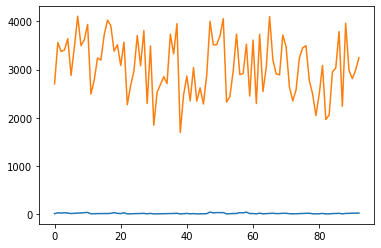

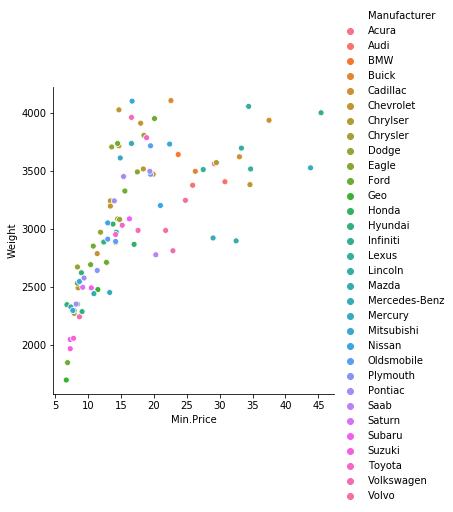

In [215]:
plt.plot(df[['Min.Price','Weight']].values)
sns.relplot(x = 'Min.Price', y = 'Weight', hue = 'Manufacturer', data = df)

In [216]:
df_val[:,df.columns.get_loc("Weight")] = scaler.fit_transform(df_val[:,df.columns.get_loc("Weight")].reshape(-1, 1)).ravel()
df_val[:,df.columns.get_loc("Min.Price")] = scaler.fit_transform(df_val[:,df.columns.get_loc("Price")].reshape(-1, 1)).ravel()
# nnumpy.ravel() == numpy.reshape(-1)
dis(df_val).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,Acura,Integra,Small,0.155963,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,0.419087,non-USA,Acura Integra
1,Acura,Legend,Midsize,0.486239,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18,5,195,115,71,38,30,15,0.773859,non-USA,Acura Legend
2,Audi,90,Compact,0.398165,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28,14,0.697095,non-USA,Audi 90
3,Audi,100,Midsize,0.555963,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31,17,0.709544,non-USA,Audi 100
4,BMW,535i,Midsize,0.414679,30,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27,13,0.807054,non-USA,BMW 535i


#### Plot Min.price vs Weight after MinMaxScalar Operation

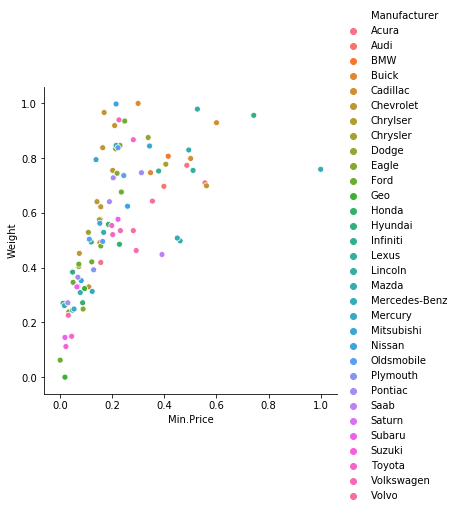

In [218]:
df1 = pd.DataFrame(columns=columns, data=df_val)
df1.head()
sns.relplot(x = 'Min.Price', y = 'Weight', hue = 'Manufacturer', data = df1)

### 2. StandardScaler example
    This transforms the data based on a normal distribution. So it will to z-scores.
    0 Mean, Unit Variance Standard Scaler
    (x-mean)/xstd

In [136]:
def dis(arr):
    return pd.DataFrame(arr)

In [190]:
df = pd.read_csv("D:\\Ipynb Datasets\\Cars93.csv")
columns = df.columns
df.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18.0,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i


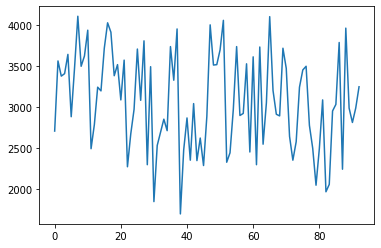

In [191]:
plt.plot(df['Weight'].values)

#### Plotted Price Vs Weight graph with original scale

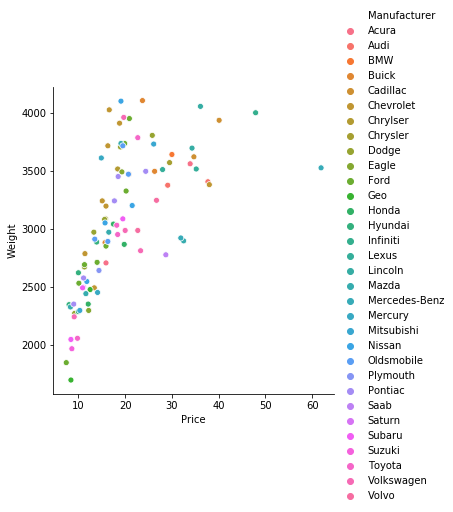

In [192]:
sns.relplot(x='Price', y='Weight', data = df, hue = 'Manufacturer')

In [193]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler
sc = StandardScaler()

In [195]:
df_val = df.values
dis(df_val).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,2705,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18,5,195,115,71,38,30,15,3560,non-USA,Acura Legend
2,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28,14,3375,non-USA,Audi 90
3,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31,17,3405,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,30,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27,13,3640,non-USA,BMW 535i


#### Plotting Weights with original scale

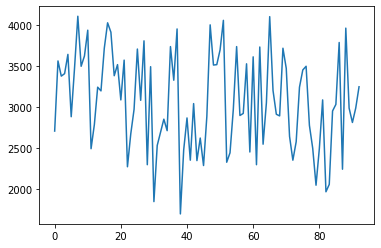

In [164]:
plt.plot(df_val[:,24])

#### Normalized the values of Prices and weights at the same scale.

In [196]:
df_val[:,df.columns.get_loc("Weight")] = sc.fit_transform(df_val[:,df.columns.get_loc("Weight")].reshape(-1, 1)).ravel()
df_val[:,df.columns.get_loc("Price")] = sc.fit_transform(df_val[:,df.columns.get_loc("Price")].reshape(-1, 1)).ravel()
# nnumpy.ravel() == numpy.reshape(-1)
dis(df_val).head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26
0,Acura,Integra,Small,12.9,-0.37572,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,-0.627055,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,1.49784,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18,5,195,115,71,38,30,15,0.830208,non-USA,Acura Legend
2,Audi,90,Compact,25.9,0.998227,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28,14,0.514894,non-USA,Audi 90
3,Audi,100,Midsize,30.8,1.89337,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31,17,0.566026,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,1.09191,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27,13,0.96656,non-USA,BMW 535i


#### Plotting the Weights with Normalized values

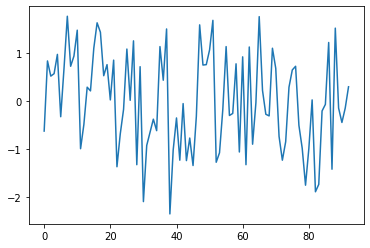

In [198]:
plt.plot(df_val[:,df.columns.get_loc("Weight")])

#### Converted the Numpay array back to datafrae for Plotting

In [199]:
df1 = pd.DataFrame(columns=columns, data=df_val)
df1.head()

,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,DriveTrain,Cylinders,EngineSize,Horsepower,RPM,Rev.per.mile,Man.trans.avail,Fuel.tank.capacity,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,Acura,Integra,Small,12.9,-0.37572,18.8,25,31,None,Front,4,1.8,140,6300,2890,Yes,13.2,5,177,102,68,37,26.5,11,-0.627055,non-USA,Acura Integra
1,Acura,Legend,Midsize,29.2,1.49784,38.7,18,25,Driver & Passenger,Front,6,3.2,200,5500,2335,Yes,18,5,195,115,71,38,30,15,0.830208,non-USA,Acura Legend
2,Audi,90,Compact,25.9,0.998227,32.3,20,26,Driver only,Front,6,2.8,172,5500,2280,Yes,16.9,5,180,102,67,37,28,14,0.514894,non-USA,Audi 90
3,Audi,100,Midsize,30.8,1.89337,44.6,19,26,Driver & Passenger,Front,6,2.8,172,5500,2535,Yes,21.1,6,193,106,70,37,31,17,0.566026,non-USA,Audi 100
4,BMW,535i,Midsize,23.7,1.09191,36.2,22,30,Driver only,Rear,4,3.5,208,5700,2545,Yes,21.1,4,186,109,69,39,27,13,0.96656,non-USA,BMW 535i


#### Plot the price Vs Weight relational plot with normalized values

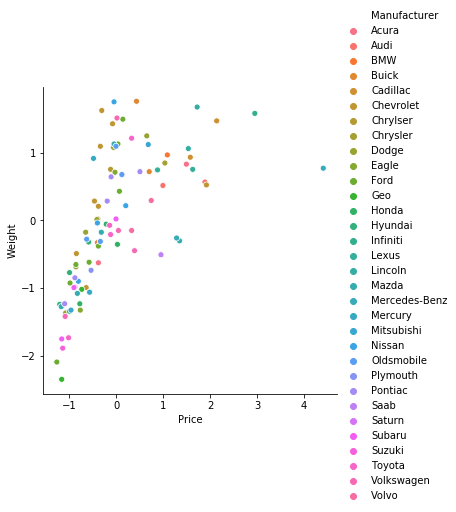

In [200]:
sns.relplot(x='Price', y='Weight', data = df1,hue = 'Manufacturer')

In [171]:
df_val1 = df.values
df_val1_trans = sc.fit_transform(df_val1)

ValueError: could not convert string to float: 'Acura'

### 3. Binarize
#https://www.youtube.com/watch?v=ygFP5SoX7aA

### 4. Normalize


## iloc function

In [39]:
data = pd.read_csv("D:\\ML Datasets\\adult_test.csv")
data.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


In [38]:
##rows:
data.iloc[0] # first row of data frame 
#data.iloc[1] # second row of data frame (Evan Zigomalas)
#data.iloc[-1] # last row of data frame (Mi Richan)
## Columns:
#data.iloc[:,0] # first column of data frame (first_name)
#data.iloc[:,1] # second column of data frame (last_name)
#data.iloc[:,-1] # last column of data frame (id)

age                              25
workclass                   Private
fnlwgt                       226802
education                      11th
education_num                     7
marital_status        Never-married
occupation        Machine-op-inspct
relationship              Own-child
race                          Black
sex                            Male
capital_gain                      0
capital_loss                      0
hours_per_week                   40
native_country        United-States
class                        <=50K.
Name: 0, dtype: object

In [10]:
# Multiple row and column selections using iloc and DataFrame
data.iloc[0:6] # first five rows of dataframe
#data.iloc[:, 0:2] # first two columns of data frame with all rows
#data.iloc[[0,3,6,24], [0,5,6]] # 1st, 4th, 7th, 25th row + 1st 6th 7th columns.
#data.iloc[0:5, 5:8] # first 5 rows and 5th, 6th, 7th columns of data frame (county -> phone1)

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K.


In [54]:
# Set the Education as index for each row
data.set_index("education_num", inplace=True)
data.head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
education_num,,,,,,,,,,,,,,
7,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
9,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K.
12,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K.
10,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K.
10,18,NaN,103497,Some-college,Never-married,NaN,Own-child,White,Female,0,0,30,United-States,<=50K.


### Get all rows and all columns except the last column

In [50]:
X = data.iloc[:,:-1]
X.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States
4,18,NaN,103497,Some-college,10,Never-married,NaN,Own-child,White,Female,0,0,30,United-States


### Get All rows of the last column

In [51]:
y = data.iloc[:,-1]
y.head()

0    <=50K.
1    <=50K.
2     >50K.
3     >50K.
4    <=50K.
Name: class, dtype: object

## loc Function

In [60]:
# Now select the rows with any partuclar index
data.loc[7].head()
# For selecting two indexed data.loc[[7,8]]

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
education_num,,,,,,,,,,,,,,
7,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K.
7,56,Self-emp-not-inc,186651,11th,Widowed,Other-service,Unmarried,White,Female,0,0,50,United-States,<=50K.
7,29,Private,103634,11th,Married-civ-spouse,Other-service,Husband,White,Male,0,0,40,United-States,<=50K.
7,52,Private,201062,11th,Separated,Priv-house-serv,Not-in-family,Black,Female,0,0,18,United-States,<=50K.
7,20,Federal-gov,244689,11th,Never-married,Other-service,Own-child,White,Female,0,0,10,United-States,<=50K.


In [65]:
# Select particular columns from indexes
data.loc[[7],['education','marital_status','relationship','sex']].head(3)

,education,marital_status,relationship,sex
education_num,,,,
7,11th,Never-married,Own-child,Male
7,11th,Widowed,Unmarried,Female
7,11th,Married-civ-spouse,Husband,Male


In [67]:
data.loc[[7, 8], 'age':'sex'].head() # Select rows with index values 7 and 8, with all columns between 'age' and 'sex'
## Select same rows, with just 'first_name', 'address' and 'city' columns
#data.loc['Andrade':'Veness', ['first_name', 'address', 'city']]


,age,workclass,fnlwgt,education,marital_status,occupation,relationship,race,sex
education_num,,,,,,,,,
7,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male
7,56,Self-emp-not-inc,186651,11th,Widowed,Other-service,Unmarried,White,Female
7,29,Private,103634,11th,Married-civ-spouse,Other-service,Husband,White,Male
7,52,Private,201062,11th,Separated,Priv-house-serv,Not-in-family,Black,Female
7,20,Federal-gov,244689,11th,Never-married,Other-service,Own-child,White,Female


In [70]:
data.head()
## Change the index to be based on the 'id' column
data.set_index('race', inplace=True)
## select the row with 'race' = White
data.loc['White'].head()

,age,workclass,fnlwgt,education,marital_status,occupation,relationship,sex,capital_gain,capital_loss,hours_per_week,native_country,class
race,,,,,,,,,,,,,
Black,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Male,0,0,40,United-States,<=50K.
White,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,Male,0,0,50,United-States,<=50K.
White,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,Male,0,0,40,United-States,>50K.
Black,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Male,7688,0,40,United-States,>50K.
White,18,NaN,103497,Some-college,Never-married,NaN,Own-child,Female,0,0,30,United-States,<=50K.


#### Boolean / Logical indexing using .loc

In [88]:
#data.loc[data['workclass']== 'Private'].head()
# Select particular columns from the above operation
data.loc[data['workclass']== 'Private',['age','workclass','occupation','sex','class']].head()


## Select rows with workclass Private, # and all columns between 'education' and 'education'
#data.loc[data['workclass'] == 'Private', 'education':'sex']
# 
## Select rows where the marital_status column ends with 'use', include all columns
#data.loc[data['marital_status'].str.endswith("use")]   
#
## Select rows with last_name equal to some values, all columns
#data.loc[data['hours_per_week'].isin(['30','40'])]   
#       
## Select rows with first name Antonio AND hotmail email addresses
#data.loc[data['marital_status'].str.endswith("use") & (data['workclass'] == 'Private')] 
# 
## select rows with hours_per_week column greater than 40 and age column less than 30, and just return 'education' and 'workclass' columns
#data.loc[(data['hours_per_week'] > 40) & (data['age'] <= 30), ['education', 'workclass']] 
# 
## A lambda function that yields True/False values can also be used.
## Select rows where the company name has 4 words in it.
#data.loc[data['occupation'].apply(lambda x: len(x.split('-')) == 2)] 
# 
## Selections can be achieved outside of the main .loc for clarity:
## Form a separate variable with your selections:

#idx = data['occupation'].apply(lambda x: len(x.split('-')) == 2)
## Select only the True values in 'idx' and only the 3 columns specified:
#data.loc[idx, ['email', 'first_name', 'company']]

,age,workclass,occupation,sex,class
race,,,,,
Black,25,Private,Machine-op-inspct,Male,<=50K.
White,38,Private,Farming-fishing,Male,<=50K.
Black,44,Private,Machine-op-inspct,Male,>50K.
White,34,Private,Other-service,Male,<=50K.
White,24,Private,Other-service,Female,<=50K.


### Setting values in DataFrames using .loc

In [91]:
# Change the occupation of all rows with age greater than 80 to 'Retired'
data.loc[data['age'] > 80, "occupation"] = "Retired"

## DataFrame.values

In [93]:
# Creating the DataFrame 
df = pd.DataFrame({'Weight':[45, 88, 56, 15, 71], 
                   'Name':['Sam', 'Andrea', 'Alex', 'Robin', 'Kia'], 
                   'Age':[14, 25, 55, 8, 21]}) 
df.head()

,Weight,Name,Age
0,45,Sam,14
1,88,Andrea,25
2,56,Alex,55
3,15,Robin,8
4,71,Kia,21


In [95]:
df.values

array([[45, 'Sam', 14],
       [88, 'Andrea', 25],
       [56, 'Alex', 55],
       [15, 'Robin', 8],
       [71, 'Kia', 21]], dtype=object)

## Fit, transform and fit_transform

Generic difference between the methods:

fit(raw_documents[, y]): Learn a vocabulary dictionary of all tokens in the raw documents.

fit_transform(raw_documents[, y]): Learn the vocabulary dictionary and return term-document matrix. This is equivalent to fit followed by the transform, but more efficiently implemented.

transform(raw_documents): Transform documents to document-term matrix. Extract token counts out of raw text documents using the vocabulary fitted with fit or the one provided to the constructor.
Both fit_transform and transform returns the same, Document-term matrix.